##### Figure S6: plots of the site frequency spectrum from each country

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import allel
import seaborn as sns

import ingenos

In [2]:
base_path = "/overflow/dschridelab/users/rrlove/aedes/"
results_path = f"{base_path}results/"
sweepfinder_path = \
f"{results_path}sweepfinder/inputs/chunked_inputs/no_relatives/"

##### read in the SF counts files

In [3]:
countries = ["Brazil", "Colombia", "USA", "Gabon", "Kenya", "Senegal"]

sfs_dict = {}

for country in countries:
    
    inpath = \
    f"{sweepfinder_path}SF2_whole_genome_{country}.111222.txt"
    
    df = pd.read_table(inpath, header=0, 
                       names=["position", "count","n_called", "folded"],
                       usecols=["position", "count","n_called"])
    
    df = df.loc[df["count"] > 0]
    
    df["freq"] = df["count"] / df["n_called"]
    
    sfs_dict[country] = df

In [4]:
sfs_dict[country].head()

,position,count,n_called,freq
0,8800,2,34,0.058824
8,8847,1,34,0.029412
17,8880,1,34,0.029412
19,8914,13,36,0.361111
21,8936,1,38,0.026316


In [5]:
outstring = ingenos.make_date_stamp(
    f"{results_path}sweepfinder/sfs_histogram_by_country",
    ".pdf")

outstring

'/overflow/dschridelab/users/rrlove/aedes/results/sweepfinder/sfs_histogram_by_country.021123.pdf'

Brazil 7418232
Colombia 8742356
USA 10717486
Gabon 16801669
Kenya 22408701
Senegal 16445705


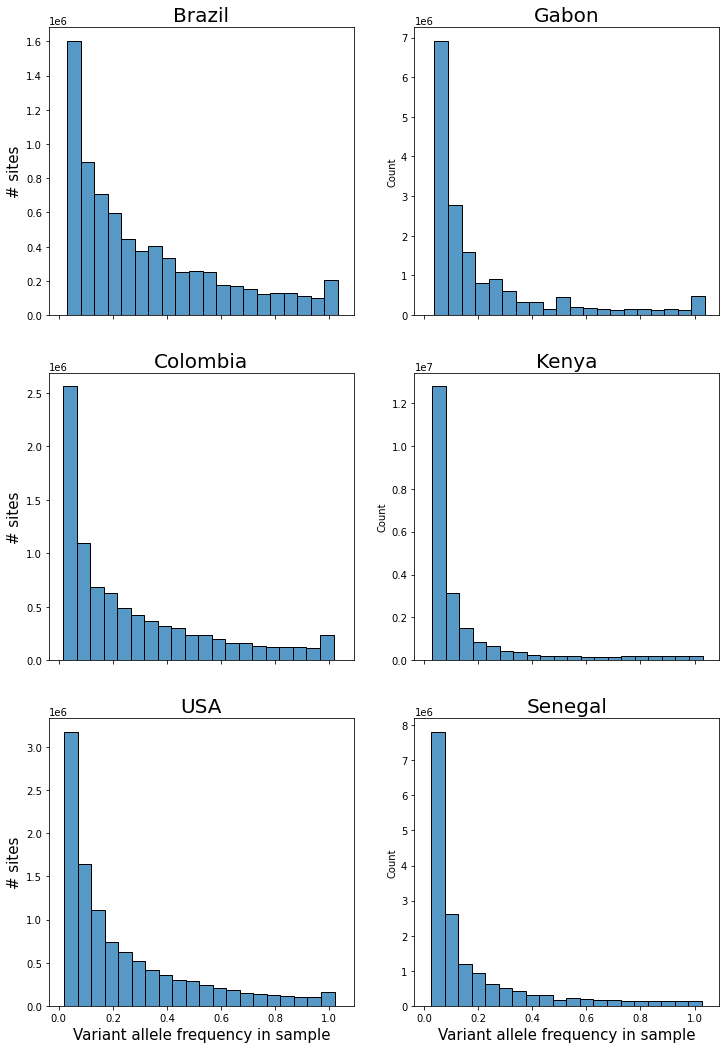

In [6]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18),
                        sharex=True)

for i, (country, sfs) in enumerate(sfs_dict.items()):
    
    print(country, len(sfs))
    
    ax = axes.T.flatten()[i]
    
    sns.histplot(data=sfs["freq"].values, ax=ax, binwidth=0.05)
    ax.set_title(f"{country}", fontsize=20)
    
    if country in ["USA", "Senegal"]:
        ax.set_xlabel("Variant allele frequency in sample", fontsize=15)
        
    if country in ["Brazil", "Colombia", "USA"]:
        ax.set_ylabel("# sites", fontsize=15)
        
#plt.savefig(outstring, bbox_inches="tight")